In [44]:
"""
Data Cleanup Exercise

https://www.dataquest.io/blog/jupyter-notebook-tutorial/
"""

'\nData Cleanup Exercise\n\nhttps://www.dataquest.io/blog/jupyter-notebook-tutorial/\n'

In [6]:
%matplotlib inline

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

In [8]:
df = pd.read_csv('fortune500.csv')

In [10]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [11]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [19]:
print("This data set contains %s records\n" % (len(df)))
print(df.dtypes)

This data set contains 25500 records

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object


In [20]:
"""
From the output of types we notice that the `profit` column is set as 
`object` instead of an expected value of `float`
"""

'\nFrom the output of types we notice that the `profit` column is set as \n`object` instead of an expected value of `float`\n'

In [24]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

NameError: name 'non_numeric_profits' is not defined

In [25]:
print("The profit column contains %d non-numberic values" % (len(df.loc[non_numberic_profits])))

The profit column contains 369 non-numberic values


In [26]:
set(df.profit[non_numberic_profits])

{'N.A.'}

In [35]:
print("%s percent of the profit results are affected by the non-numberic profits issue" % '{:0,.2f}%'.format((len(df.loc[non_numberic_profits])/len(df)*100)))

1.45% percent of the profit results are affected by the non-numberic profits issue


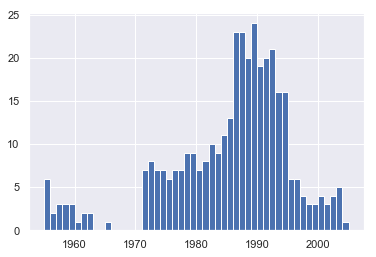

In [37]:
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))

In [39]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)

In [40]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit

def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

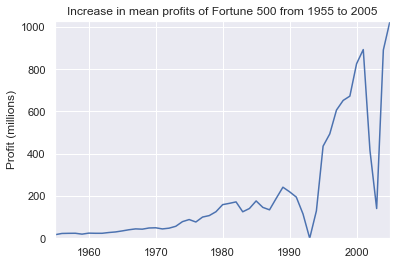

In [43]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean profits of Fortune 500 from 1955 to 2005', 'Profit (millions)')